# Diamonds dataset

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
#import sklearn.preprocessing
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("diamonds2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   carat       1000 non-null   float64
 2   cut         994 non-null    object 
 3   color       1000 non-null   object 
 4   clarity     1000 non-null   object 
 5   depth       1000 non-null   float64
 6   table       1000 non-null   float64
 7   price       993 non-null    float64
 8   x           996 non-null    float64
 9   y           997 non-null    float64
 10  z           1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


### 2. Change the name of the very first column to idx and set this variable as the index of the dataset

In [125]:
columns = list(df.columns)
columns[0] = "idx"
df.columns = columns

print(df.columns)

df.set_index("idx")
df.index

Index(['idx', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')


RangeIndex(start=0, stop=1000, step=1)

### 3. Check how many (and which) features have non-null values

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      1000 non-null   int64  
 1   carat    1000 non-null   float64
 2   cut      994 non-null    object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    993 non-null    float64
 8   x        996 non-null    float64
 9   y        997 non-null    float64
 10  z        1000 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


The columns "cut", "price", "x" and "y" have null values.

### 4. Create a subset of your original dataset with only the attributes: carat, cut, depth, price

In [127]:
df_subset = df[["carat", "cut", "depth", "price"]]
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1000 non-null   float64
 1   cut     994 non-null    object 
 2   depth   1000 non-null   float64
 3   price   993 non-null    float64
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


### 5. Use the function pairplot() in seaborn to plot all features in a pairwise manner.

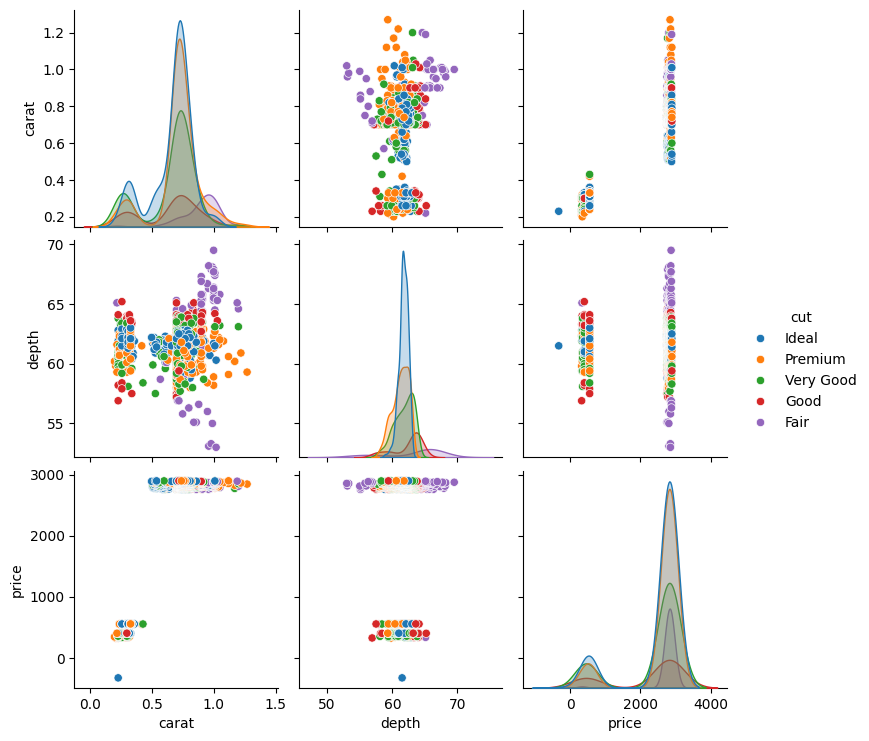

In [128]:
numeric_cols = ["carat", "depth", "price"]
sns.pairplot(df_subset, hue="cut", hue_order=["Ideal", "Premium", "Very Good", "Good", "Fair"], vars= numeric_cols)

### 6. Check if there are negative values.

In [129]:
all_numeric_cols = ["carat", "depth", "table", "price", "x", "y", "z"]

for col in all_numeric_cols:
    if not df.loc[df[col] < 0].empty:
        print(df.loc[df[col] < 0])

   idx  carat    cut color clarity  depth  table  price     x   y     z
0    1   0.23  Ideal     E     SI2   61.5   55.0 -326.0  3.95 NaN  2.43
     idx  carat      cut color clarity  depth  table   price     x     y     z
698  699   0.82  Premium     I     VS1   61.9   58.0  2853.0 -5.99  5.97  3.70
844  845   1.08  Premium     D      I1   61.9   60.0  2869.0 -6.55  6.48  4.03
     idx  carat  cut color clarity  depth  table   price     x     y     z
962  963   0.71  NaN     E     VS2   61.6   56.0  2891.0  5.74  5.76 -3.54


### 7. Set the variables that are negative to null values

In [130]:
for col in all_numeric_cols:
    if not df.loc[df[col] < 0].empty:
        df.loc[df[col] < 0] = float("NaN")

In [131]:
for col in all_numeric_cols:
    if not df.loc[df[col] < 0].empty:
        print(df.loc[df[col] < 0])

### 8. Set the null values to the mean of the features excluding the null values

In [132]:
for col in all_numeric_cols:
    not_NaN = pd.isna(df[col]) == False
    mean = np.mean(df.loc[not_NaN, col])
    df[pd.isna(df[col]) == True] = mean

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   idx      1000 non-null   float64
 1   carat    1000 non-null   float64
 2   cut      995 non-null    object 
 3   color    1000 non-null   object 
 4   clarity  1000 non-null   object 
 5   depth    1000 non-null   float64
 6   table    1000 non-null   float64
 7   price    1000 non-null   float64
 8   x        1000 non-null   float64
 9   y        1000 non-null   float64
 10  z        1000 non-null   float64
dtypes: float64(8), object(3)
memory usage: 86.1+ KB


### 9. Set the null values in “cut” to the most frequent value

In [145]:
df["cut"].value_counts()

cut
Ideal         327
Premium       283
Very Good     220
Good           87
Fair           61
2472.33611      7
0.689197        4
22.927098       4
22.956681       2
Name: count, dtype: int64

In [146]:
df[pd.isna(df["cut"]) == True] = "Ideal"

/tmp/ipykernel_10656/2945383999.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ideal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[pd.isna(df["cut"]) == True] = "Ideal"
/tmp/ipykernel_10656/2945383999.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ideal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[pd.isna(df["cut"]) == True] = "Ideal"
/tmp/ipykernel_10656/2945383999.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Ideal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[pd.isna(df["cut"]) == True] = "Ideal"
/tmp/ipykernel_10656/2945383999.py:1: FutureWarning: Setting an item of incompatib